<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Analisi di serie temporali**:

Per aiutarti negli esercizi che seguiranno, ricorda:

**Stagionalità**: tendenza di una variabile a ripetere periodicamente il proprio comportamento si chiama stagionalità.

La stagionalità (annuale) è semplice con l'energia solare: ogni anno osserviamo lo stesso comportamento, dovuto alla disponibilità di luce solare.

La stagionalità non è necessariamente meterologica: pensate ai saldi durante le festività natalizie.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Utilizzando il dataset denominato *OPSD_Germany_all*, svolgi i seguenti esercizi:

- Esercizio 1

    Usa gli strumenti che abbiamo visto finora per tracciare il consumo di energia elettrica.

    Che tipo di **stagionalità** possiamo osservare su questa variabile? Come può essere interpretato?
    

- Esercizio 2

    Analizza la stagionalità settimanale del consumo di energia elettrica utilizzando le funzioni groupby (Pandas) ed eventualmente aiutati creando boxplot con Seaborn.
    

- Esercizio 3

    Confronta (all'interno di un singolo grafico) la serie mensile (di un anno a scelta) di:
    - consumo di energia elettrica 
    - produzione di energia rinnovabile (solare, eolica e la somma delle due).
   
    Tracciare la serie annuale del rapporto tra
    - produzione di energia rinnovabile
    - consumo di energia elettrica
    

- Esercizio 4 [facoltativo]

    Il resampling e il rolling nelle serie temporali sono due modi per implementare medie incrementali nel tempo. 

Traccia la produzione settimanale di energia solare durante il 2017/01-07 utilizzando resample e rolling. Confronta i risultati grafici.

### Esercizio 1

In [2]:
#pip install --upgrade -q prophet statsmodels

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

from prophet import Prophet

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (25.0, 15.0)
sns.set()

In [4]:
#Load data

df = pd.read_csv('OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')

In [5]:
df['Weekday'] = df.index.day_name()

In [6]:
df.head()

,Consumption,Wind,Solar,Weekday
Date,,,,
2006-01-01,1069.184,NaN,NaN,Sunday
2006-01-02,1380.521,NaN,NaN,Monday
2006-01-03,1442.533,NaN,NaN,Tuesday
2006-01-04,1457.217,NaN,NaN,Wednesday
2006-01-05,1477.131,NaN,NaN,Thursday


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Weekday      4383 non-null   object 
dtypes: float64(3), object(1)
memory usage: 171.2+ KB


In [8]:
decomposition = seasonal_decompose(df['Consumption']['2016-01':'2016-12'])

<Figure size 2500x700 with 0 Axes>

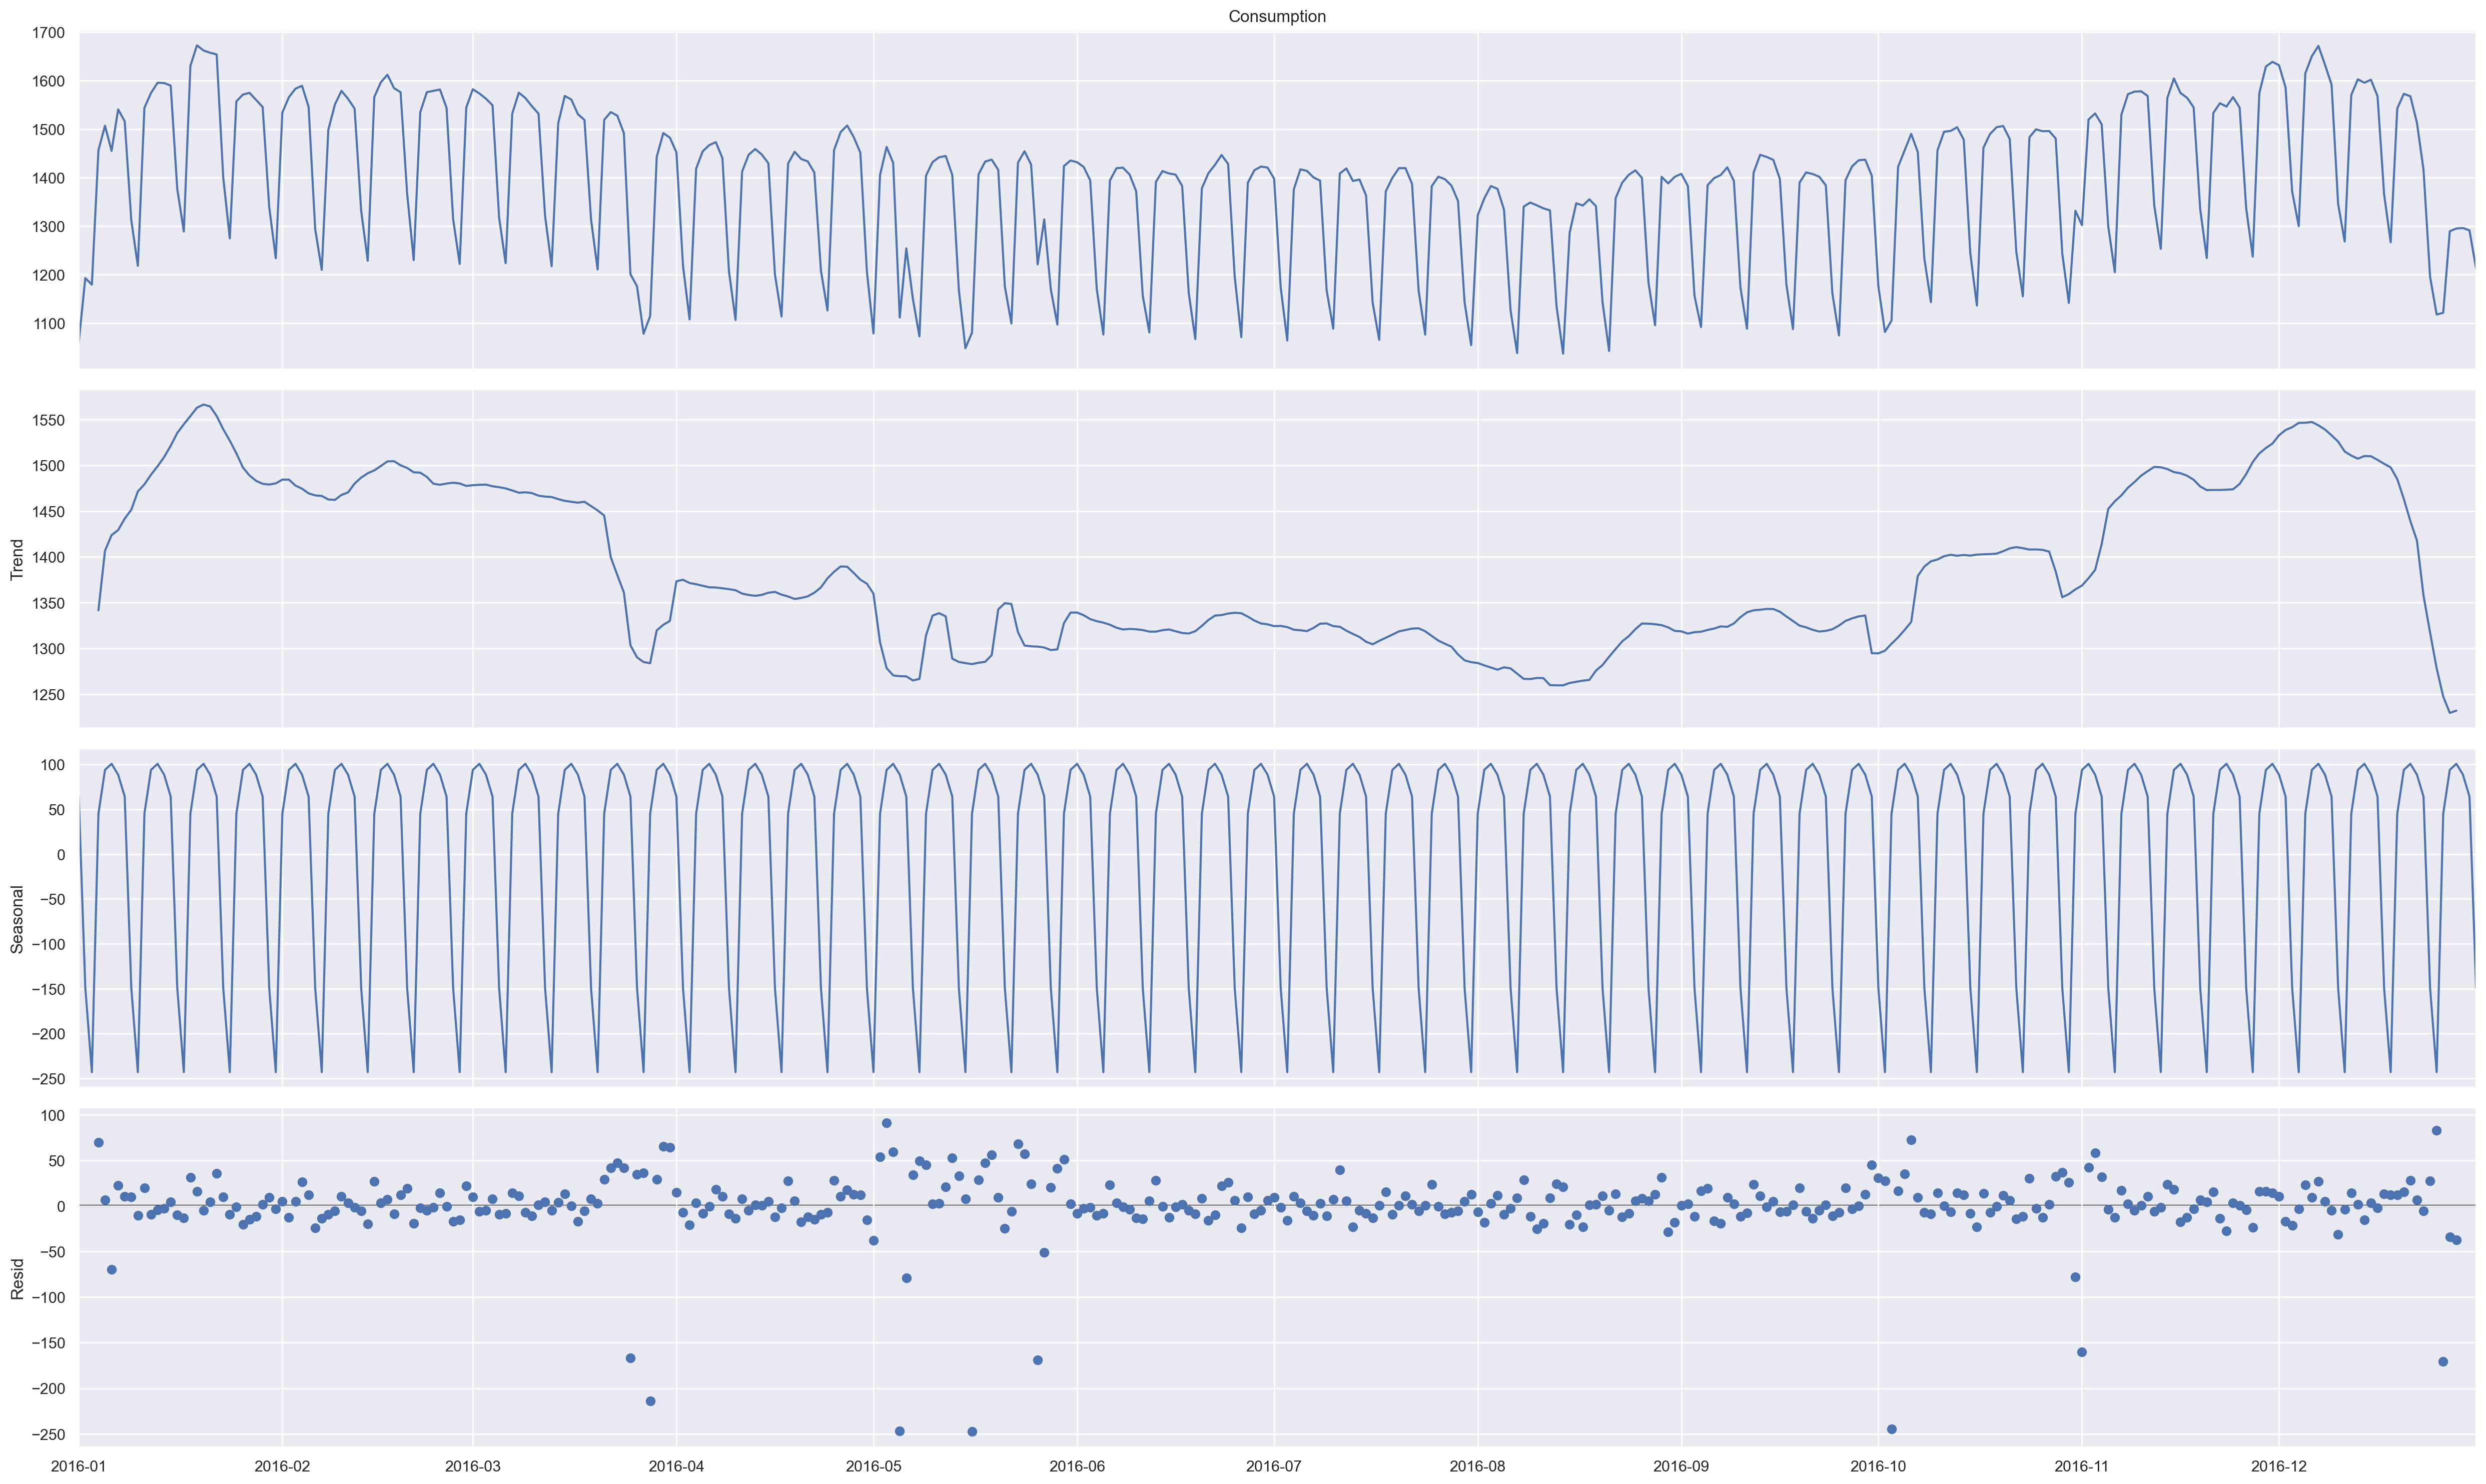

In [9]:
plt.figure(figsize=(25,7))
plot = decomposition.plot()

La stagionalità del consumo di energia elettrica ha una frequenza settimanale. I consumi di elettricità diminuiscono infatti durante i weekend e aumentano durante la settimana lavorativa.

### Esercizio 2

In [10]:
df_weekday = df.groupby(by='Weekday')

In [11]:
mean = df_weekday['Consumption'].mean().sort_values(ascending=True)

In [27]:
mean

Weekday
Sunday       1103.104493
Saturday     1200.549839
Monday       1389.786334
Friday       1394.624076
Thursday     1421.158254
Tuesday      1428.277624
Wednesday    1433.606541
Name: Consumption, dtype: float64

In [12]:
std = df_weekday['Consumption'].std().sort_values(ascending=True)

In [13]:
std

Weekday
Sunday        92.522127
Saturday      95.438479
Wednesday    109.099736
Tuesday      111.531241
Friday       119.088443
Thursday     123.760518
Monday       129.388600
Name: Consumption, dtype: float64

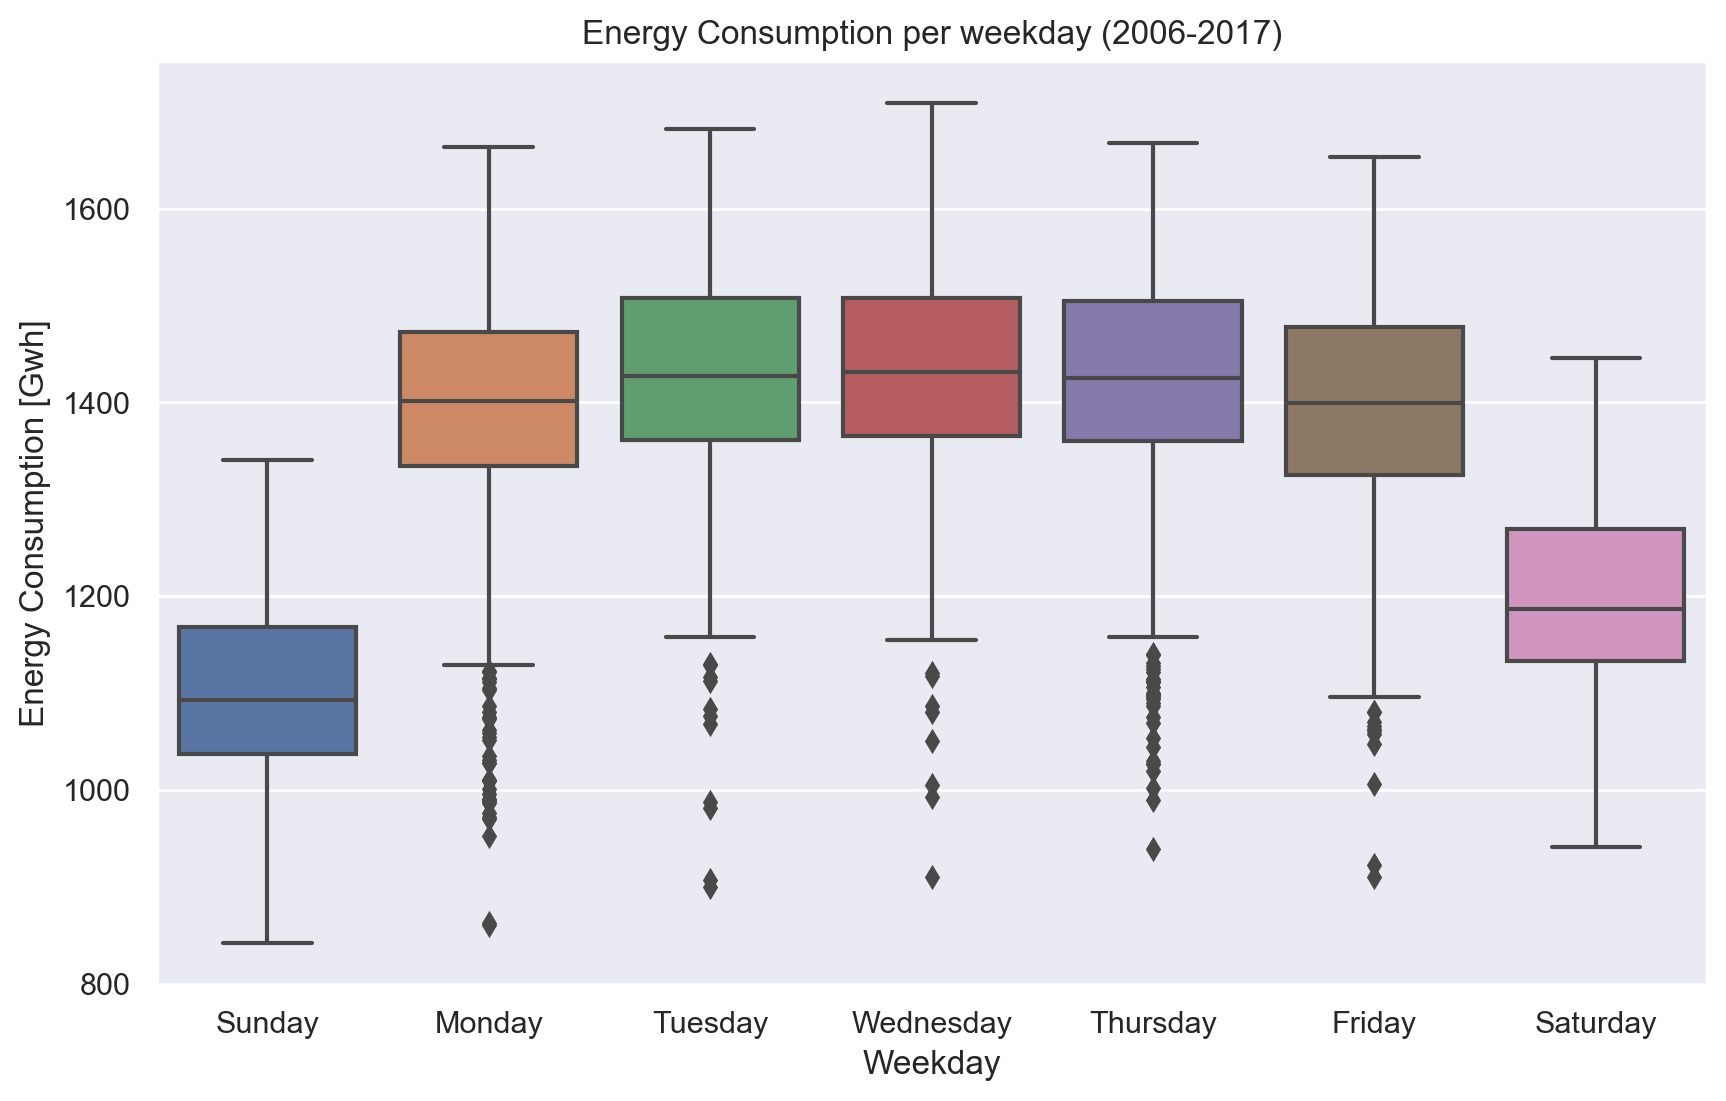

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weekday', y='Consumption', data=df)
plt.title('Energy Consumption per weekday (2006-2017)')
plt.ylabel('Energy Consumption [Gwh]')
plt.show()

### Esercizio 3

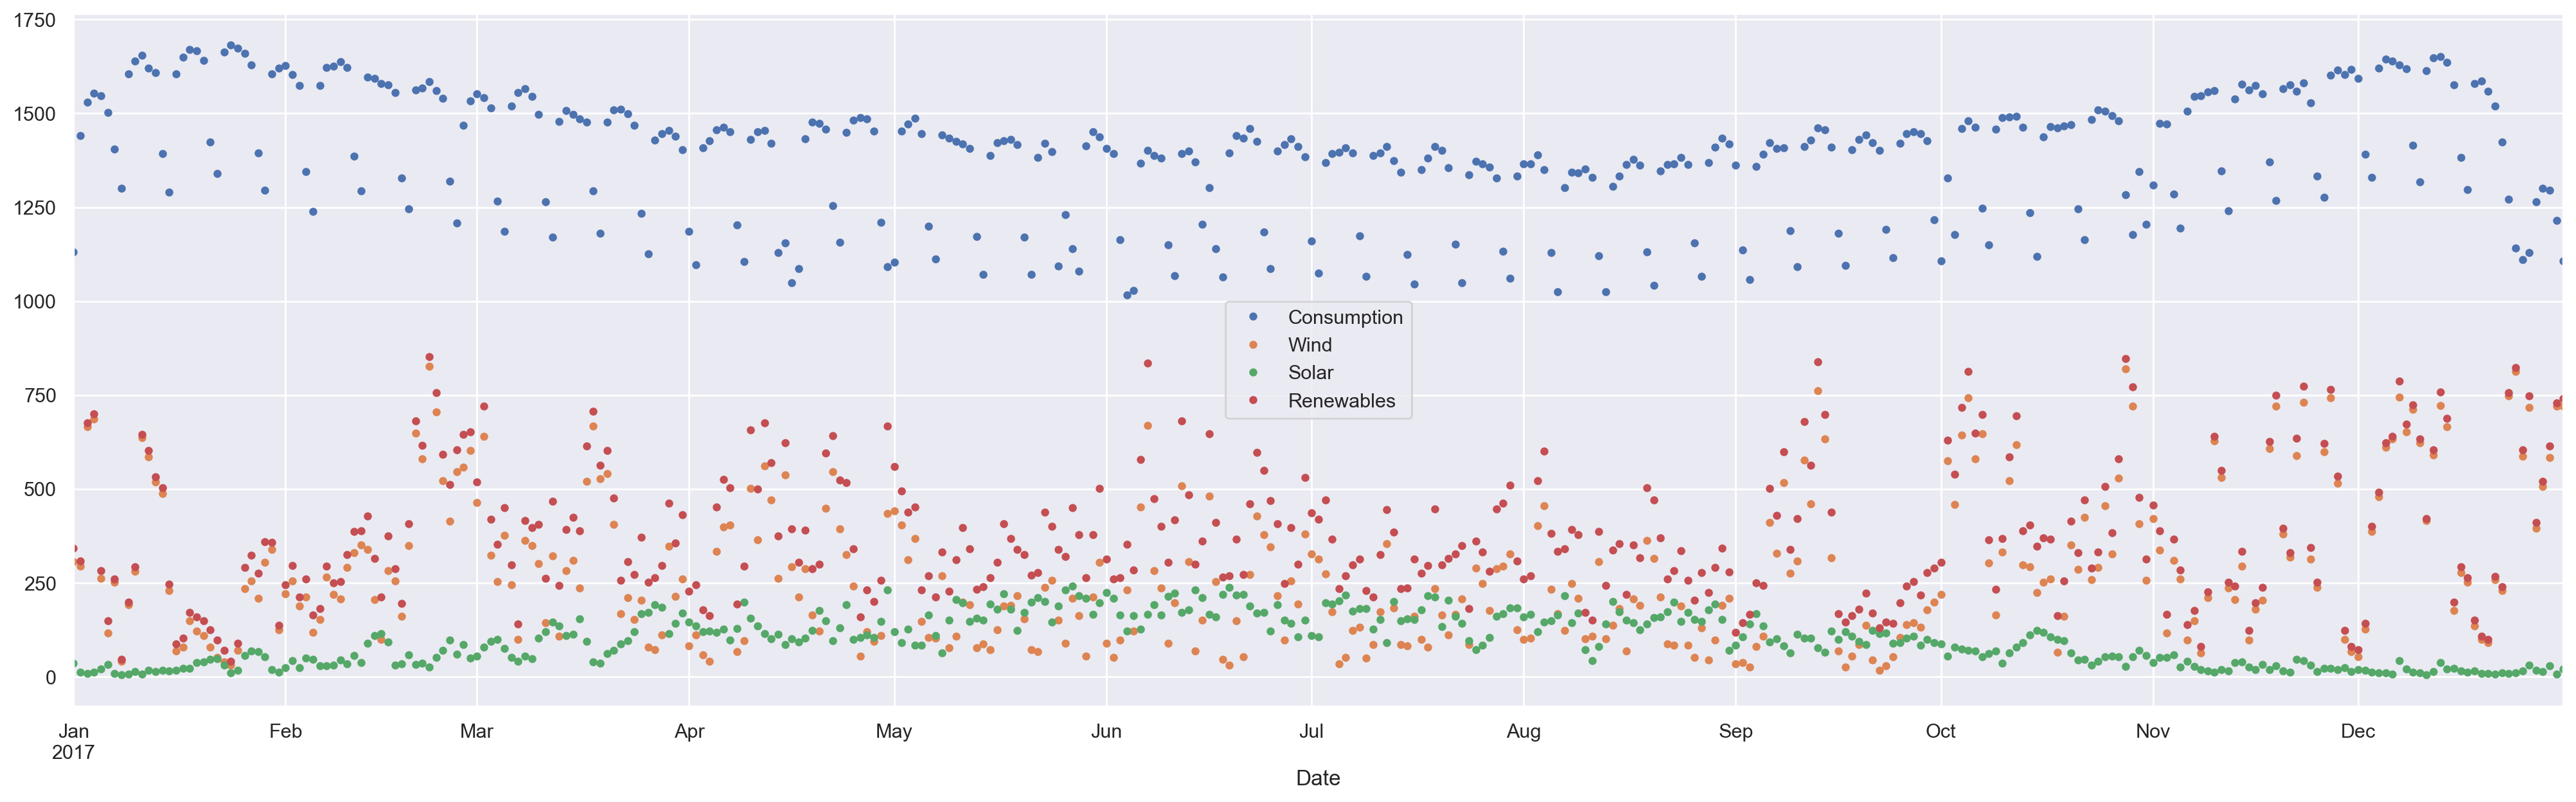

In [15]:
df['Renewables'] = df['Solar'] + df['Wind']

df.loc['2017'].plot(figsize=(25, 7),
                   marker='.',
                   markersize=7,
                   linestyle='');

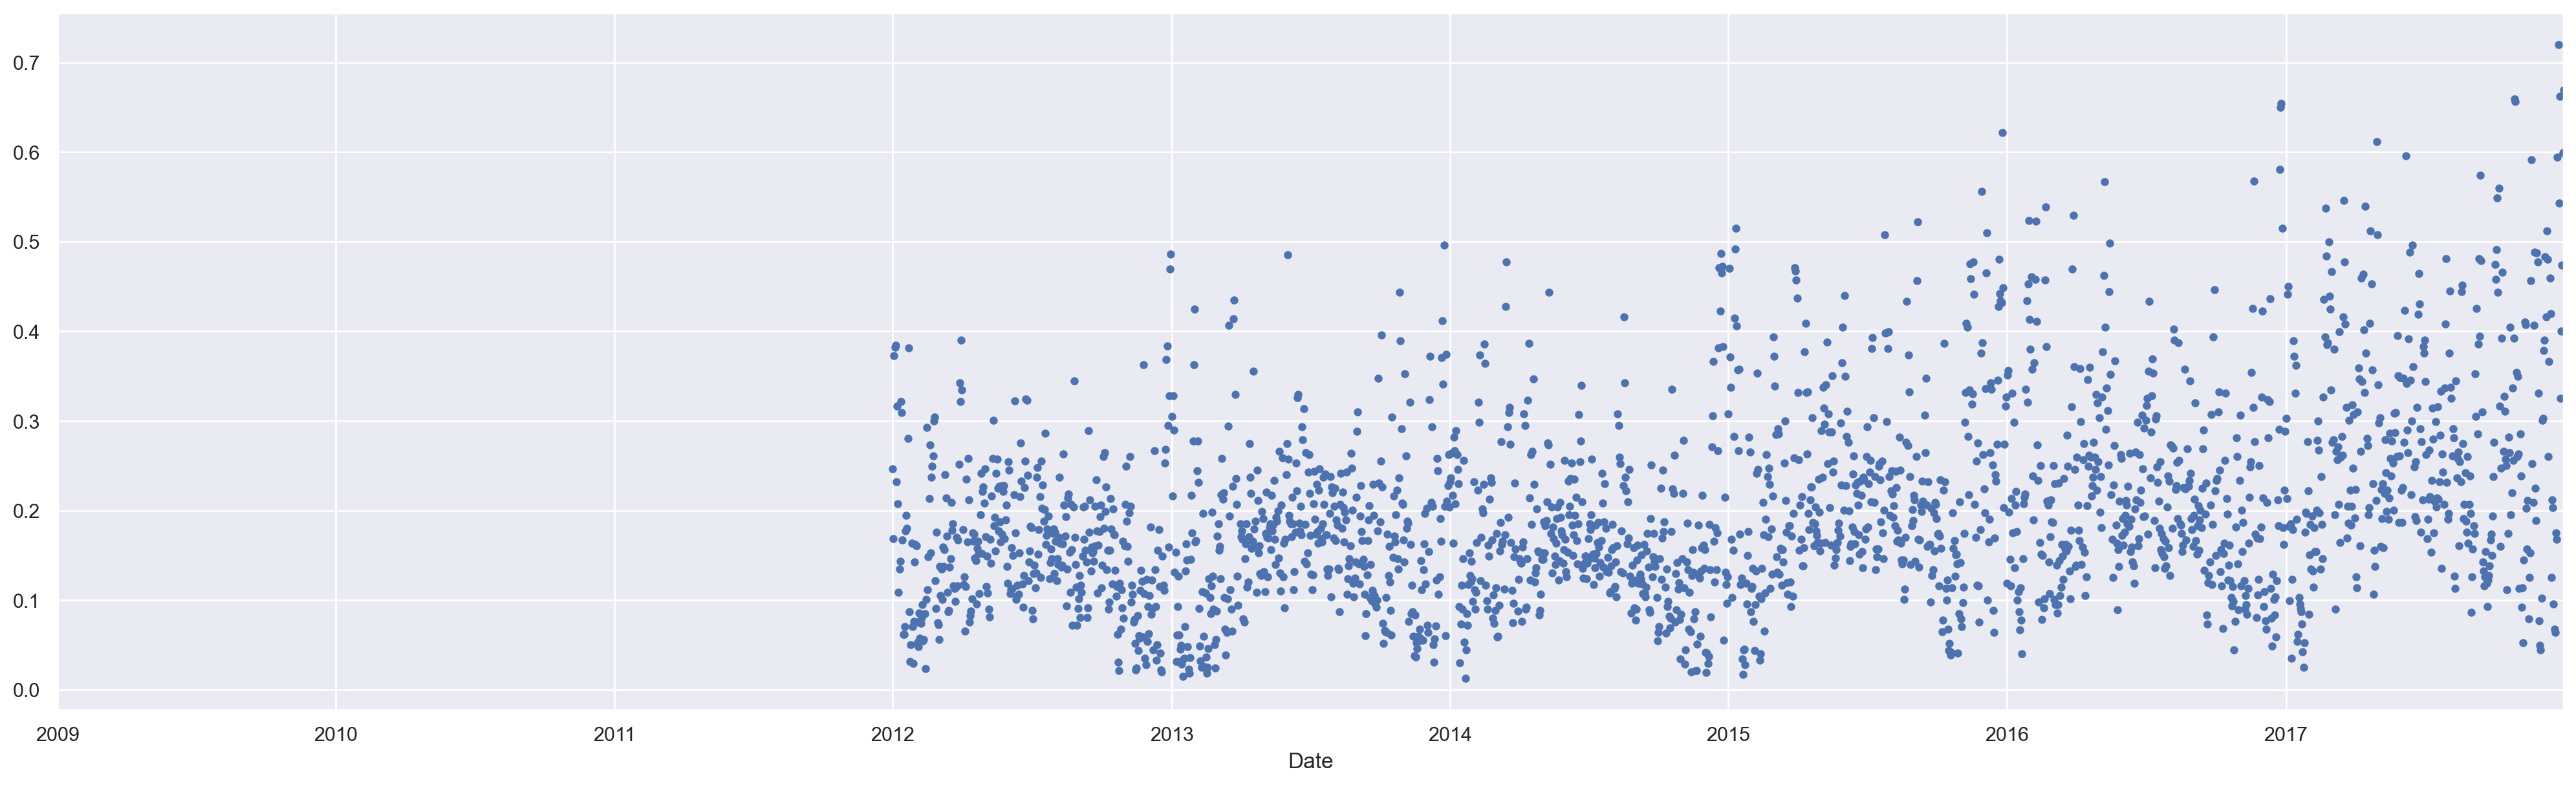

In [29]:
df['ratio'] = df['Renewables']/df['Consumption']

df['ratio'].loc['2009':'2017'].plot(figsize=(25, 7),
                   marker='.',
                   markersize=7,
                   linestyle='');


### Esercizio 4

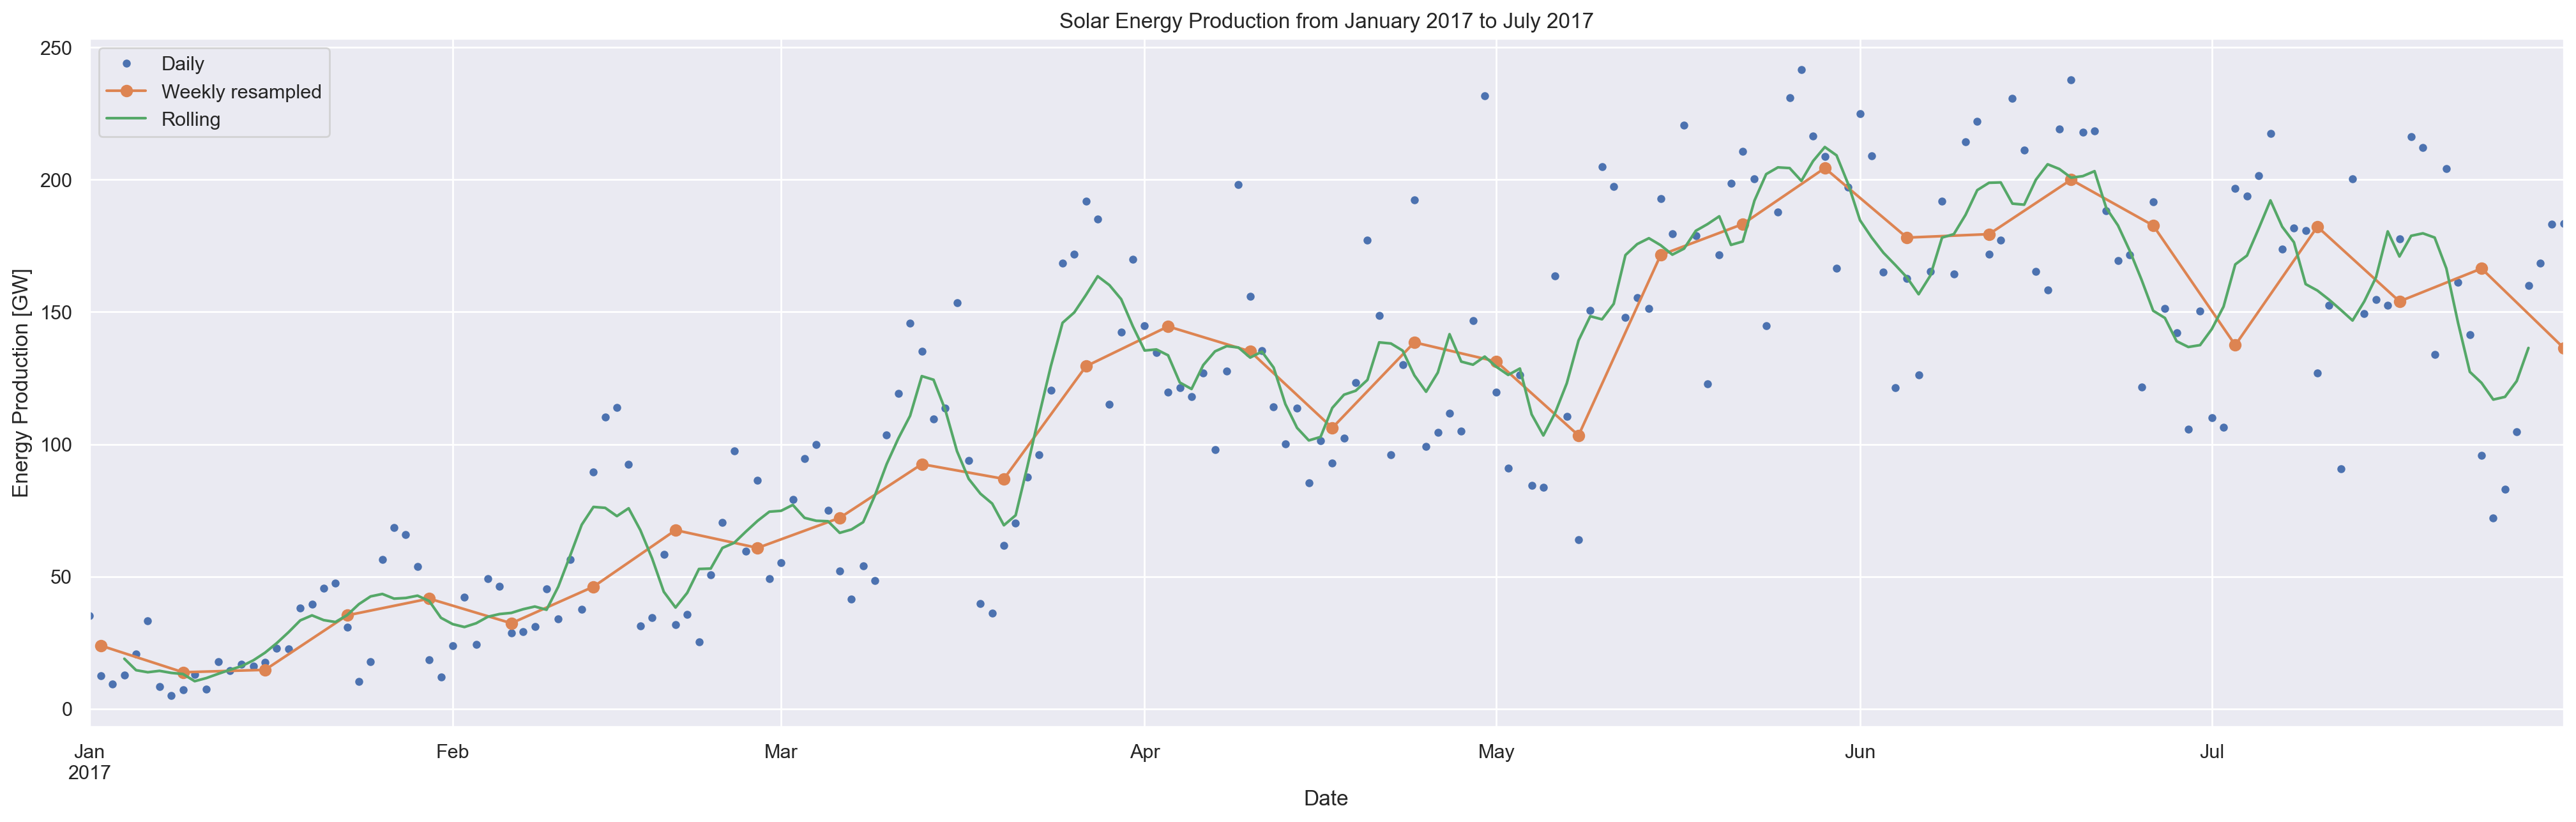

In [17]:
df['Solar'].loc['2017-01':'2017-07'].plot(figsize=(25, 7),
                   marker='.',
                   markersize=7,
                   linestyle='', label='Daily');

df_solar_weekly_resampled = df['Solar'].loc['2017-01':'2017-07'].resample('W-MON').mean()
df_solar_weekly_rolling = df['Solar'].loc['2017-01':'2017-07'].rolling(7, center=True).mean()

plt.plot(df_solar_weekly_resampled ,
         marker='o',
         label='Weekly resampled')

plt.plot(df_solar_weekly_rolling ,
         label='Rolling')

plt.title('Solar Energy Production from January 2017 to July 2017')
plt.ylabel('Energy Production [GW]')
plt.legend()
plt.show()


### Extra

Forecast and represent the solar energy production of $2017$, by using years from $2012$ to $2016$ as training data. 

In [18]:
df_train = df.loc['2012':'2016']
df_test = df.loc['2017']

In [19]:
df_train_prophet = df_train[['Solar']].reset_index()
df_train_prophet

,Date,Solar
0,2012-01-01,6.587
1,2012-01-02,6.574
2,2012-01-03,24.679
3,2012-01-04,14.681
4,2012-01-05,5.071
...,...,...
1822,2016-12-27,23.448
1823,2016-12-28,19.450
1824,2016-12-29,42.910
1825,2016-12-30,48.546


In [20]:
df_train_prophet.columns = ['ds', 'y']
df_train_prophet

,ds,y
0,2012-01-01,6.587
1,2012-01-02,6.574
2,2012-01-03,24.679
3,2012-01-04,14.681
4,2012-01-05,5.071
...,...,...
1822,2016-12-27,23.448
1823,2016-12-28,19.450
1824,2016-12-29,42.910
1825,2016-12-30,48.546


In [21]:
model = Prophet()
model.fit(df_train_prophet);

19:22:28 - cmdstanpy - INFO - Chain [1] start processing
19:22:29 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future = model.make_future_dataframe(periods=365, include_history=False)
future

,ds
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
...,...
360,2017-12-27
361,2017-12-28
362,2017-12-29
363,2017-12-30


In [23]:
test_predictions = model.predict(future)

In [24]:
test_predictions[['ds','yhat']]

,ds,yhat
0,2017-01-01,27.661523
1,2017-01-02,28.724340
2,2017-01-03,27.716951
3,2017-01-04,28.943843
4,2017-01-05,31.311735
...,...,...
360,2017-12-27,31.801356
361,2017-12-28,34.054150
362,2017-12-29,32.474773
363,2017-12-30,30.444902


In [25]:
df_test['Prediction'] = test_predictions['yhat'].values
df_test

C:\Users\enric\AppData\Local\Temp\ipykernel_3908\3045451321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Prediction'] = test_predictions['yhat'].values


,Consumption,Wind,Solar,Weekday,Renewables,ratio,Prediction
Date,,,,,,,
2017-01-01,1130.41300,307.125,35.291,Sunday,342.416,0.302912,27.661523
2017-01-02,1441.05200,295.099,12.479,Monday,307.578,0.213440,28.724340
2017-01-03,1529.99000,666.173,9.351,Tuesday,675.524,0.441522,27.716951
2017-01-04,1553.08300,686.578,12.814,Wednesday,699.392,0.450325,28.943843
2017-01-05,1547.23800,261.758,20.797,Thursday,282.555,0.182619,31.311735
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,Wednesday,411.037,0.325203,31.801356
2017-12-28,1299.86398,506.424,14.162,Thursday,520.586,0.400493,34.054150
2017-12-29,1295.08753,584.277,29.854,Friday,614.131,0.474200,32.474773


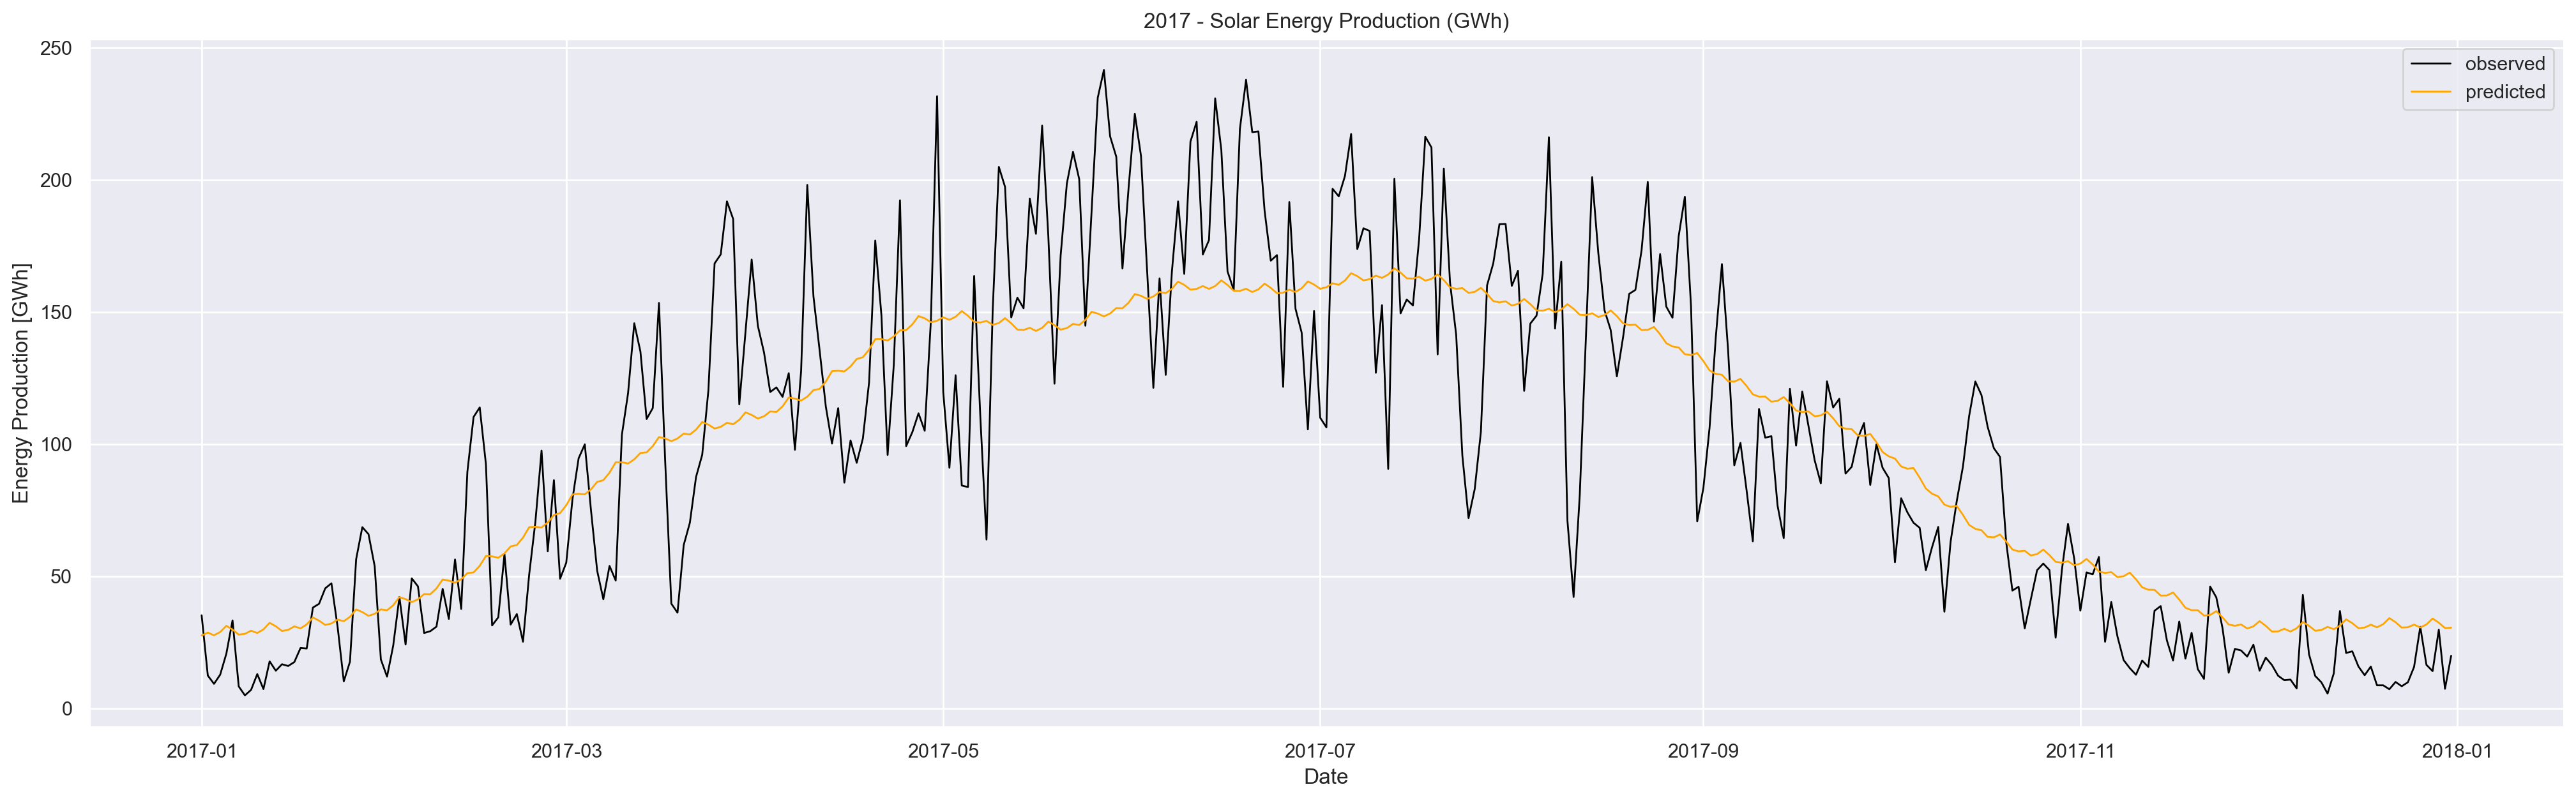

In [26]:
plt.figure(figsize=(25, 7))

plt.plot(df_test['Solar'],
         linestyle='-',
         color='black',
         linewidth=1,
         label='observed')

plt.plot(df_test['Prediction'],
         linestyle='-',
         linewidth=1,
         color='orange',
         label='predicted')

plt.title('2017 - Solar Energy Production (GWh)')
plt.xlabel('Date')
plt.ylabel('Energy Production [GWh]')
plt.legend()
plt.show()